# Assignment 2: Predicting a Categorical Variable Using Multiple Model

## 1. Dataset Selection

**Student Placement Prediction Dataset**

The main objetive is to predict whether students will be recruited during campus placements based on various factors.

**Source:** https://www.kaggle.com/c/ml-with-python-course-project/data.

**Dataset information:** The dataset, sourced from Kaggle, contained in the train.csv file 215 rows and 15 attributes. This dataset has a clear categorical target variable that is called "status", which indicates whether a student is "Placed" or "Not Placed."

**Attribute Information:**

- sl_no: an anonymous id unique
- gender: Gender
- ssc_p: Secondary Education percentage (10th Grade)
- ssc_b: Board of Education (10th Grade)
- hsc_p: Higher Secondary Education percentage (12th Grade)
- hsc_b: Board of Education (12th Grade)
- hsc_s: Specialization in Higher Secondary Education
- degree_p: Degree percentage
- degree_t: Type of undergraduate degree
- workex: Work Experience
- etest_p: E-test percentage
- specialisation: MBA Specialization
- mba_p: MBA percentage
- status: Placement Status
- salary: Salary offereds.

## 2. Data Preprocessing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:
dataset=pd.read_csv('train.csv')

In [4]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
dataset.shape

(215, 15)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [7]:
dataset['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

**Observations:**

-  All columns, except for "salary", have complete data (no missing values). The 148 values in the salary column are only for the status "Placed". This variable does not help us in the prediction of whether a student will be placed or not, as it is only recorded after the placement has occurred. Therefore, it is not useful as a feature for predicting placement status. I will proceed by dropping this column.
  
-  The dataset uses standard data types: integers for numerical identifiers, floats for percentages and salary, and objects for categorical data like gender and specializations. I will proceed by encoding the categorical variables to prepare the data for modeling.

In [8]:
# descriptive statistics of the numerical columns
dataset.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


**Observations:**
- The dataset has a higher proportion of male students.
- Students tend to perform consistently across SSC, HSC, and degree levels, with average scores in the mid-60s to low-70s.
- E-test scores show more variability compared to other academic scores.
- MMBA scores are close to the average for most students, showing that their performance in MBA courses is quite similar.

In [9]:
# descriptive statistics for categorical columns
dataset.describe(include='object')

,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215
unique,2,2,3,3,2,2,2
top,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,116,131,113,145,141,120,148


**Observations:**
- The majority of students come from 'Central' boards for secondary education and 'Others' boards for higher secondary education.
- 'Commerce' is the most common stream in higher secondary.
- Most students have degrees in 'Commerce & Management'.
- A significant number of students do not have work experience.
- 'Marketing & Finance' is the preferred specialization.
- Most students have been successfully placed in jobs.

### Data Cleaning

In [10]:
## Identyfying missing values
dataset[dataset.isnull().any(axis=1)]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,0,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,0,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,1,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,0,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,1,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,1,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,0,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,0,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,1,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


**Note:** It is only the 67 rows with "salary" null. This is going to be handled by dropping this column for the reasons mentioned before.

In [11]:
# Dropping the 'salary' column
dataset = dataset.drop(columns=['salary'])
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [12]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

<ipython-input-13-24b0d77a537e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=dataset, palette='viridis')
<ipython-input-13-24b0d77a537e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=dataset, palette='viridis')
<ipython-input-13-24b0d77a537e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=dataset, palette='viridis')
<ipython-input-13-24b0d77a537e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

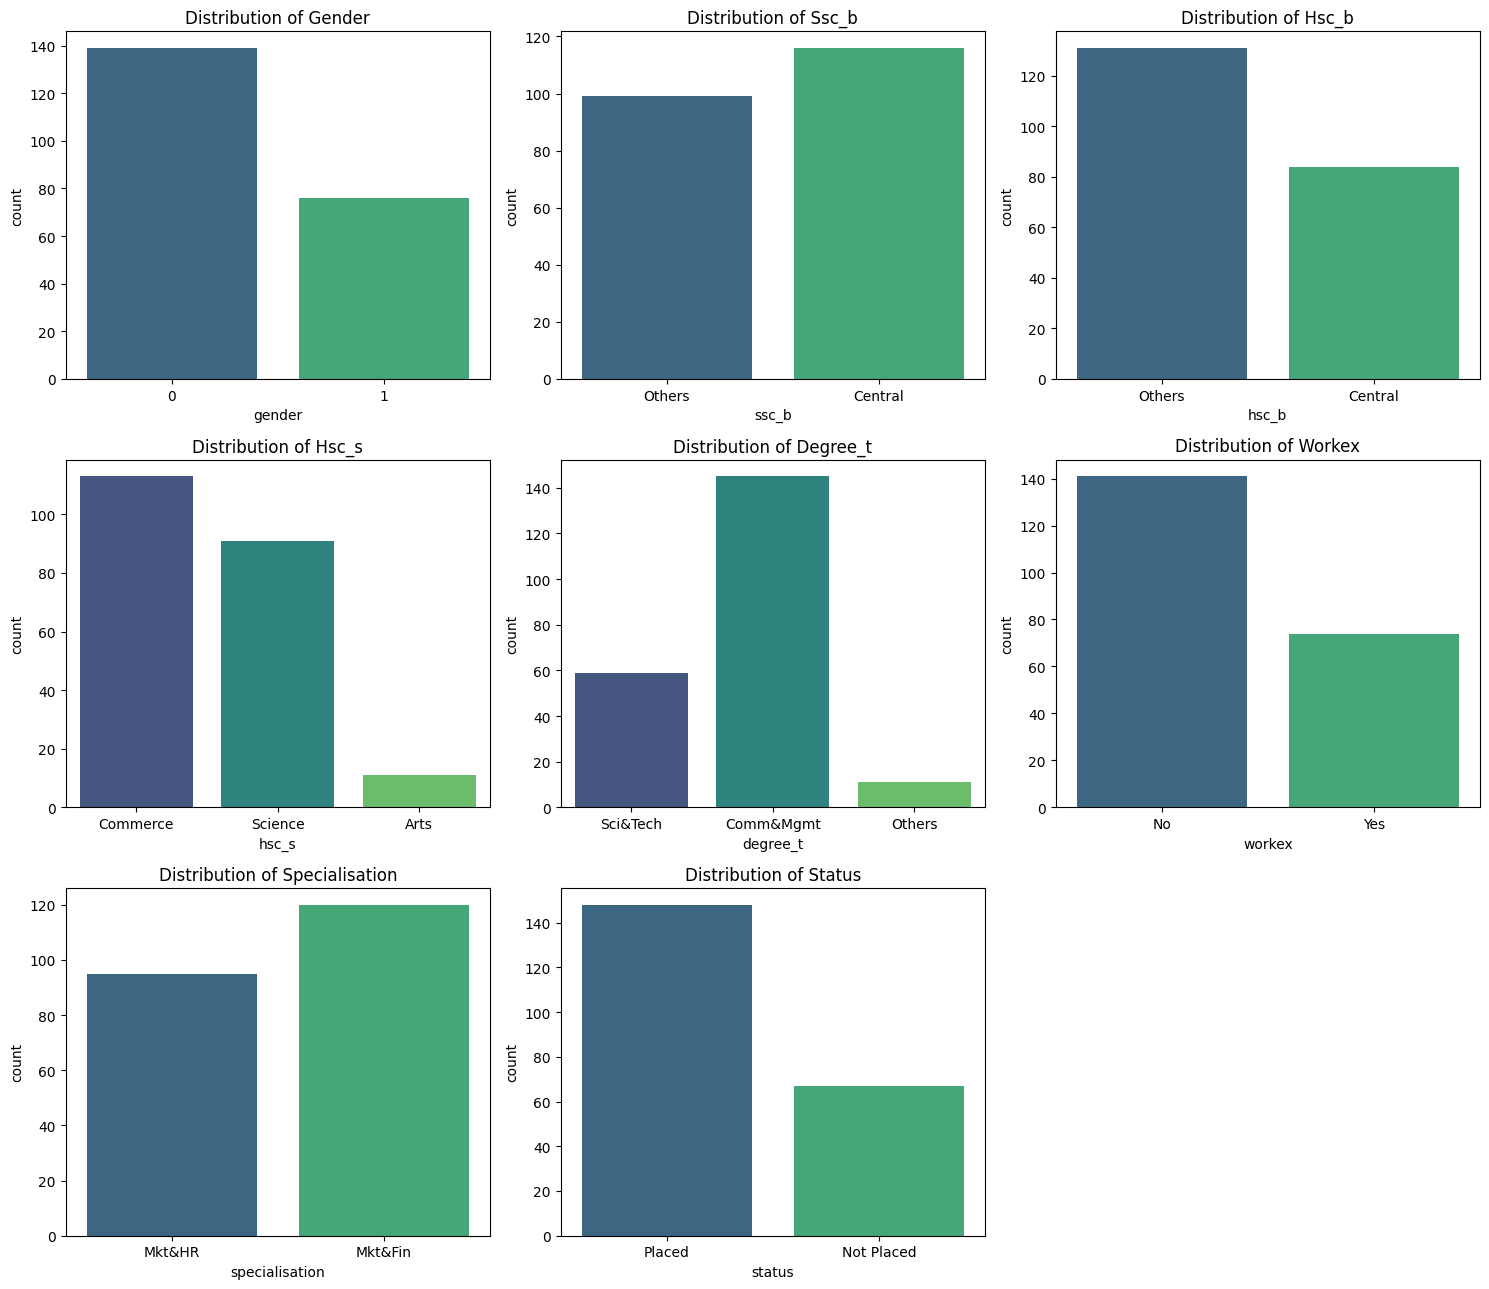

In [13]:
#Visualization of the distributions of the categorical columns

# List of categorical columns
categorical_columns = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status"]

# Function to create bar plots for categorical columns
def create_barplots(dataset, columns):
    num_columns = len(columns)
    plt.figure(figsize=(15, 5 * num_columns // 3))  # Adjust the figsize based on the number of plots

    for i, column in enumerate(columns):
        plt.subplot((num_columns + 2) // 3, 3, i + 1)
        sns.countplot(x=column, data=dataset, palette='viridis')
        plt.title(f'Distribution of {column.capitalize()}')

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame and categorical columns
create_barplots(dataset, categorical_columns)

**Observation:** After examining the visualizations for each categorical column, I observe that the categorical values are consistent across the dataset. There are no discrepancies or variations in the naming of categories within each column. It is not necessary to make any changes in the cleaning process.

In [14]:
#Finding the duplicates
dataset[dataset.duplicated()]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status


**Note:** Duplicated were not found in the dataaset

### Exploratory Data Analysis

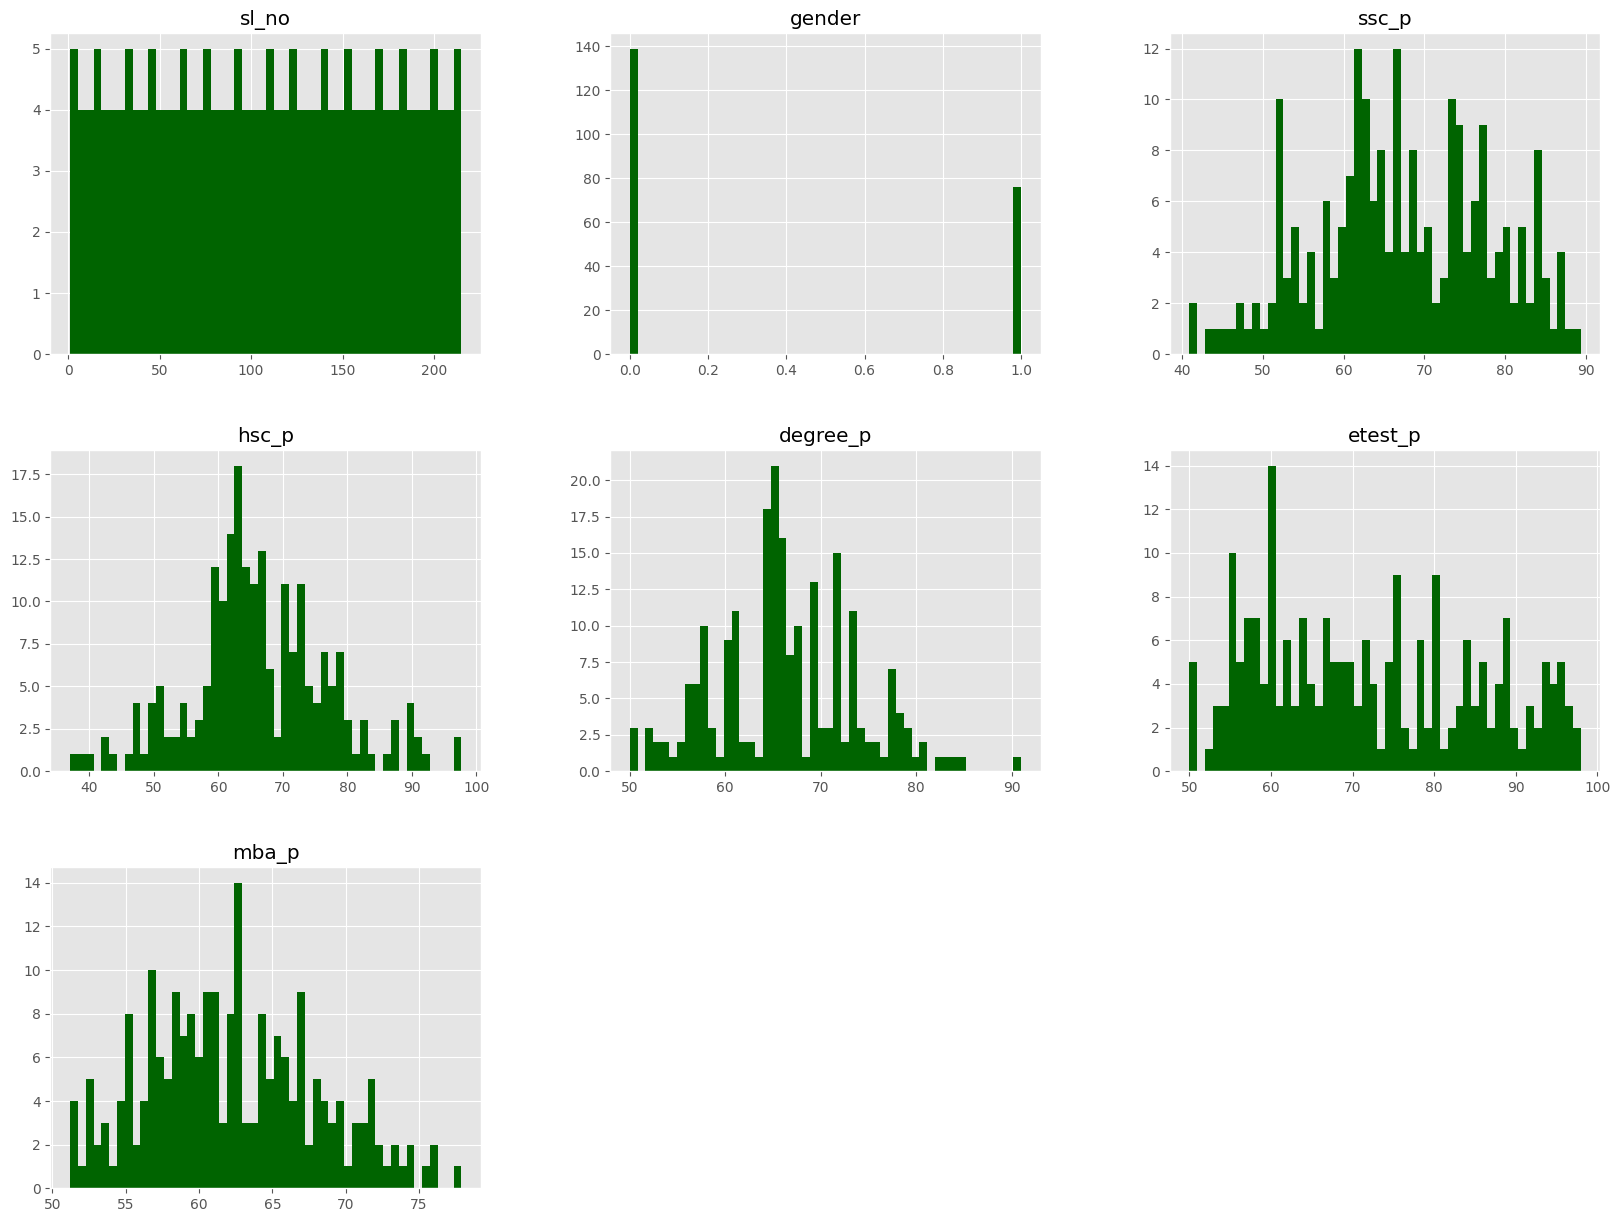

In [15]:
## Plotting desnity plot for all features
plt.style.use('ggplot')

# Set the color you want for the histograms
color = "darkgreen"

dataset.hist(bins=50,figsize=(20,15),color=color)
plt.show()

In [16]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


Outliers detected using IQR:
     sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
24      25       0  76.50   Others  97.70   Others   Science     78.86   
42      43       0  49.00   Others  39.00  Central   Science     65.00   
49      50       1  50.00   Others  37.00   Others      Arts     52.00   
120    121       0  58.00   Others  40.00   Others   Science     59.00   
134    135       1  77.44  Central  92.00   Others  Commerce     72.00   
169    170       0  59.96   Others  42.16   Others   Science     61.26   
177    178       1  73.00  Central  97.00   Others  Commerce     79.00   
206    207       0  41.00  Central  42.00  Central   Science     60.00   
197    198       1  83.96   Others  53.00   Others   Science     91.00   

      degree_t workex  etest_p specialisation  mba_p      status  
24    Sci&Tech     No    97.40        Mkt&Fin  74.01      Placed  
42      Others     No    63.00        Mkt&Fin  51.21  Not Placed  
49      Others     No    65.0

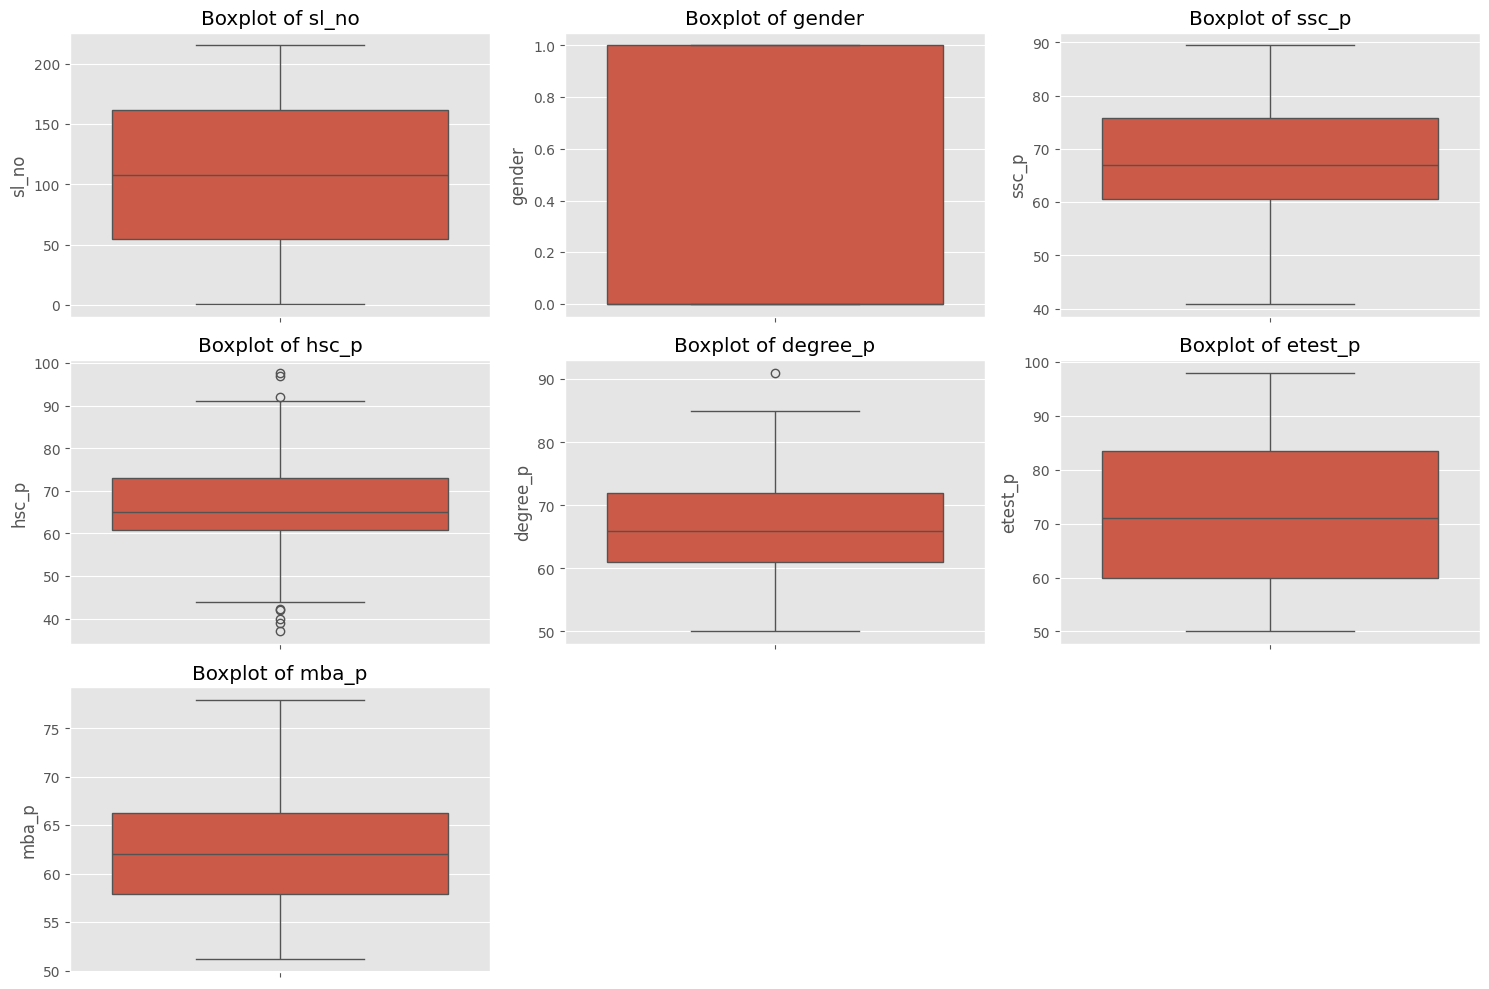

In [17]:
#Chequing outliers
# Function to detect outliers using IQR
def detect_outliers_iqr(dataset):
    outliers = pd.DataFrame()
    for column in dataset.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dataset[column].quantile(0.25)
        Q3 =dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = pd.concat([outliers, dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]])
    return outliers.drop_duplicates()

# Detect outliers
outliers = detect_outliers_iqr(dataset)
print("Outliers detected using IQR:")
print(outliers)

# Visual inspection using boxplots
numeric_columns =dataset.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=dataset[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

**Observations:**
-  Some students have exceptionally high scores in certain areas. For example, the students with sl_no 25 and 178 have notably high hsc_p (97.7 and 97, respectively).
- Some students have very low scores. For instance, the student with sl_no 43 has an ssc_p of 49 and an hsc_p of 39, both of which are lower than typical scores.
- There are cases with unusual combinations of scores and placements. For instance, the student with sl_no 198 has a high ssc_p (83.96) and degree_p (91), but their hsc_p is relatively low (53).
- The identified outliers show a wide range of scores in ssc_p, hsc_p, degree_p, and etest_p, indicating variability in academic performance among students.

**Note:** Despite identifying these outliers, I will not drop any values from the dataset because it only contains 215 rows. Removing these data points could result in losing valuable information, which is crucial for maintaining the integrity of the analysis and prediction.

### Encoding for categorical variables.

In [18]:
# Create a copy for encoded DataFrame
df_encoded = dataset.copy()

# Columns to be label encoded
categorical_columns = ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

# Initialize LabelEncoder
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le
df_encoded

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,212,0,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,213,0,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,214,1,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


### Correlation

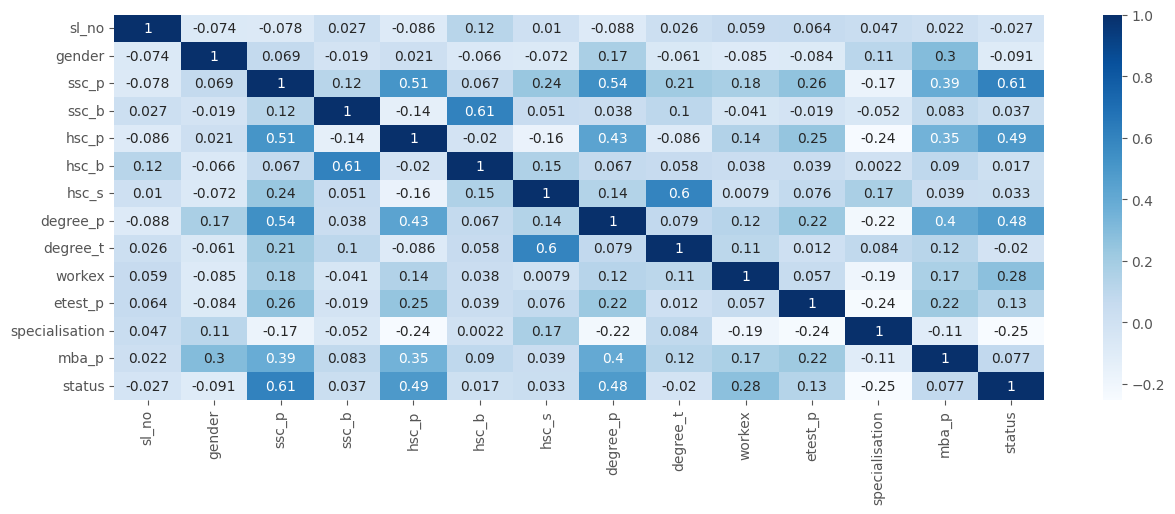

In [19]:
#Createing a  Heatmap:
plt.figure(figsize=(15,5))
sns.heatmap(df_encoded.corr(), cmap='Blues', annot=True)
plt.show()

**Observations:**
The most relevant observations from the correlation matrix:

- ssc_p has a strong positive correlation with status (0.607).
- hsc_p shows a strong positive correlation with status (0.491).
- degree_p is positively correlated with status (0.480).
- ssc_p has a high positive correlation with degree_p (0.538).
- ssc_p and hsc_p have a positive correlation (0.511).
- specialisation shows a moderate negative correlation with status (-0.251).


### Split the Data into Train and Test Sets

In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop(columns=['status'])
y = df_encoded['status']

# Split the dataset into training and testing sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (172, 13)
Shape of X_test: (43, 13)
Shape of y_train: (172,)
Shape of y_test: (43,)


###  Utilize Standard Scaling:

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the shapes of the scaled datasets
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (172, 13)
Shape of X_test_scaled: (43, 13)


### Box Plots To understand Effect Of Standard Scaler

<ipython-input-23-41fb1d7ced73>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

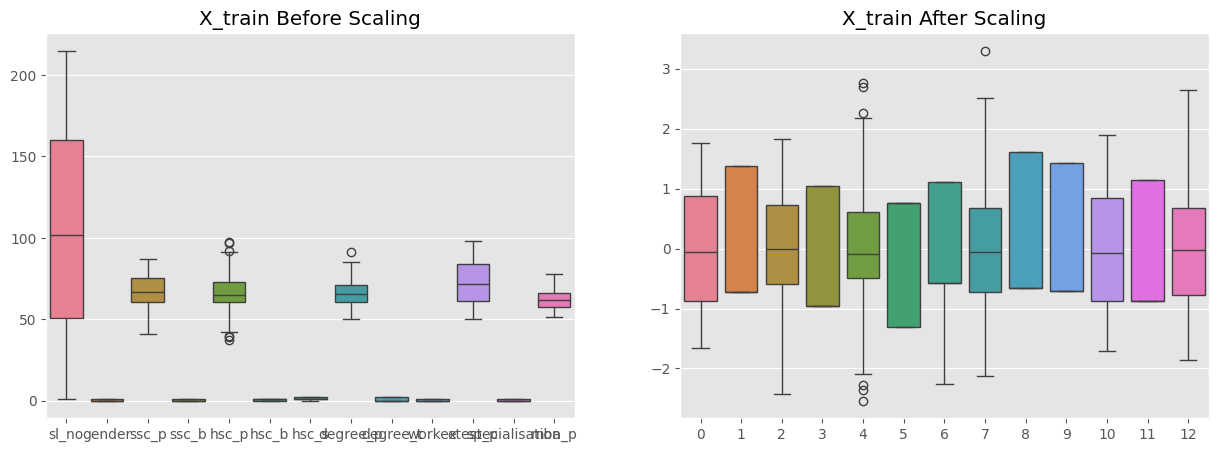

In [23]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## 3. Model Selection

For this classification problem, I chose these four machine learning models:

- Logistic Regression: This model is straightforward and effective for binary classification tasks. It provides probabilities for class predictions, making it easy to interpret. It works particularly well when there's a linear relationship between the features and the target variable.

- Random Forest Classifier: This is an ensemble method that combines multiple decision trees to enhance accuracy and reduce overfitting. It works well with both numerical and categorical data and offers feature importance scores, helping us understand which features influence the model's decisions the most.

- Support Vector Machine (SVM): SVM is very effective in high-dimensional spaces and is useful when there are more features than samples. It creates a hyperplane to separate classes and can use different kernel functions to handle non-linear relationships, making it quite versatile.

- Gradient Boosting Classifier: This is another powerful ensemble technique that builds models in a sequence, with each new model correcting the errors of the previous ones. It's highly effective for many classification problems and often performs better than individual models by focusing on difficult-to-classify examples.

## 4. Model Training and Evaluation

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [25]:
# Initialize the models
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)
gradient_boosting = GradientBoostingClassifier()

# List of models to evaluate
models = [
    ('Logistic Regression', log_reg),
    ('Random Forest', random_forest),
    ('SVM', svm),
    ('Gradient Boosting', gradient_boosting)
]

In [26]:
# Training and evaluating each model

#Creating an empty dictionary called results to store the evaluation metrics for each model.
results = {}

#The next  code is for the following:
#Loop through each model in the list of models.
#Train the model using the scaled training data X_train_scaled and the corresponding labels y_train.
#Use the trained model to make predictions on the scaled test data X_test_scaled.
#If the model can predict probabilities (checked using hasattr), get the probability of the positive class for each test sample. This is used for ROC AUC calculation.
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None


# For each model, calculate the following evaluation metrics:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    conf_matrix = confusion_matrix(y_test, y_pred)

#Save these metrics in the results dictionary under the name of the current model.
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': conf_matrix
    }

In [27]:
# Creating a DataFrame for the evaluation results
evaluation_results = {
    'Model': list(results.keys()),
    'Accuracy': [results[model]['Accuracy'] for model in results],
    'Precision': [results[model]['Precision'] for model in results],
    'Recall': [results[model]['Recall'] for model in results],
    'F1 Score': [results[model]['F1 Score'] for model in results],
    'ROC AUC': [results[model]['ROC AUC'] for model in results]
}

# Converting to DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

# Display the DataFrame
evaluation_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.883721,0.906250,0.935484,0.920635,0.935484
1,Random Forest,0.767442,0.800000,0.903226,0.848485,0.852151
2,SVM,0.837209,0.833333,0.967742,0.895522,0.913978
3,Gradient Boosting,0.837209,0.852941,0.935484,0.892308,0.876344


**Overall Insights:**
- Top Performer: Logistic Regression comes out on top with the highest accuracy and a very strong balance between precision and recall. It is the most reliable in predicting outcomes accurately.
- SVM excels in recall. This model is very good at catching almost all positive cases but is a bit less precise than Logistic Regression.
- Gradient Boosting: performs well overall but is slightly behind Logistic Regression and SVM.
-Random Forestl isgood at identifying positive cases but makes more mistakes in predicting positive cases than the others.
  
Overall, Logistic Regression performs the best across all these metrics, making it the most reliable and effective model for this classification problem.

## 5. Voting Classifier

In [28]:
from sklearn.ensemble import VotingClassifier

# Initialize the individual classifiers
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)
gradient_boosting = GradientBoostingClassifier()

# Create the Voting Classifier
ensemble_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('random_forest', random_forest),
        ('svm', svm),
        ('gradient_boosting', gradient_boosting)
    ],
    voting='soft'  # 'soft' uses predicted probabilities to make the final prediction
)

ensemble_clf

VotingClassifier(estimators=[('log_reg', LogisticRegression()),
                             ('random_forest', RandomForestClassifier()),
                             ('svm', SVC(probability=True)),
                             ('gradient_boosting',
                              GradientBoostingClassifier())],
                 voting='soft')

In [29]:
# Fit the ensemble model
ensemble_clf.fit(X_train_scaled, y_train)

# Predict using the Voting Classifier
y_pred_ensemble = ensemble_clf.predict(X_test_scaled)
y_pred_ensemble_proba = ensemble_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred_ensemble)
precision = precision_score(y_test, y_pred_ensemble)
recall = recall_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble)
roc_auc = roc_auc_score(y_test, y_pred_ensemble_proba)
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)

results['Voting Classifier'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'Confusion Matrix': conf_matrix
}
print(f"Voting Classifier - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

Voting Classifier - Accuracy: 0.8140, Precision: 0.8286, Recall: 0.9355, F1 Score: 0.8788, ROC AUC: 0.9274


**Observations:** Based on the metrics results, Logistic Regression is the better model compared to the Voting Classifier. It has higher accuracy, precision, F1 score, and ROC AUC, making it more reliable and effective for this classification task.

### Confusion matrices

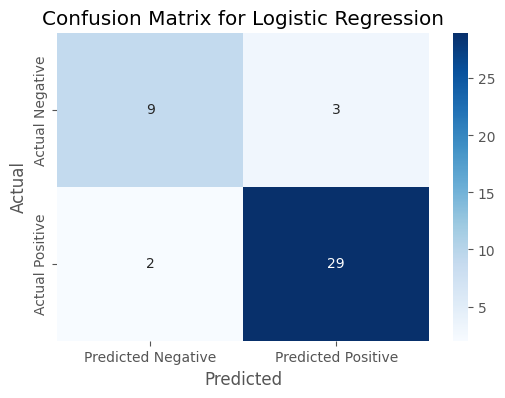

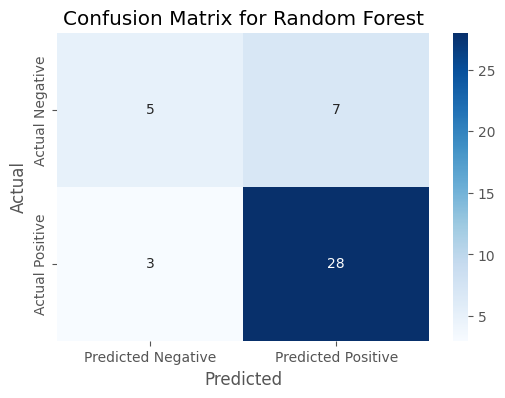

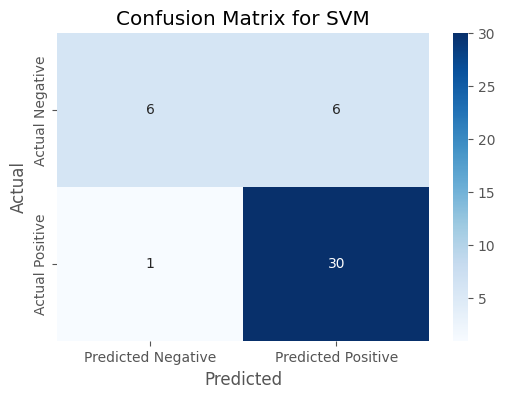

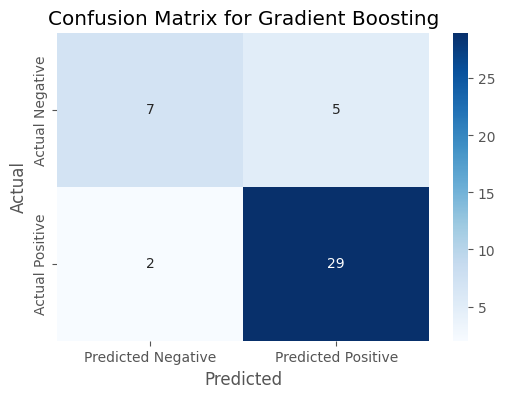

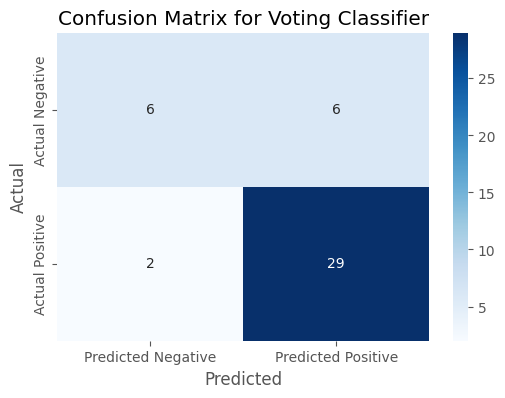

In [30]:
# Function to plot confusion matrices
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plotting confusion matrices for each model
for model_name in results:
    plot_confusion_matrix(results[model_name]['Confusion Matrix'], model_name)

**Observations:**
-  Best at Finding Positives: SVM is the best at correctly finding positive cases, with 30 true positives and only 1 missed positive.
-  Well-Balanced Models: Logistic Regression, Gradient Boosting, and Voting Classifier all do a good job of balancing correct positive and negative cases.
-  Needs Improvement: Random Forest makes the most mistakes by incorrectly predicting positive cases, so it needs some adjustments to improve.